### Challenge
* [ Dataset source](#source)
* [Dataset Features](#features)
* [Connect to any exchange rates API](#connect) (Sample - [Exchange Rates API](https://exchangeratesapi.io/)) to get exchange rates of Australia to New Zealand for the past 30 days into json output format
* [Pre process the data to manage any expected issues](#process)
* [Perform some data analysis](#perform)
    * Find the best and worst exchange rates for that time period
    * Calculate the average exchange rate for the month
* [Additional features or optimizations that you think are relevant and show off your skills.](#addition)

### Dataset Source: <a name="source"></a> 
Historical exchange rates for AUD to NZD using Yahoo Finance
https://au.finance.yahoo.com/


### Dataset Features:<a name="features"></a>

| Feature name | Data type | Units     | Description |
| ------------ | --------- | --------- |------------ |
| Open | numerical | Exchange rate (AUD to NZD) | The price of the exchange rate at the beginning of the trading period (typically the start of the trading day). |
| High | numerical | Exchange rate (AUD to NZD) | The highest price of the exchange rate during the trading period. |
| Low | numerical | Exchange rate (AUD to NZD) | The lowest price of the exchange rate during the trading period. |
| Close | numerical | Exchange rate (AUD to NZD) | The price of the exchange rate at the end of the trading period (typically the end of the trading day). |
| Adj Close | numerical | Exchange rate (AUD to NZD) | The closing price after adjustments for all applicable splits and dividend distributions. |
| Volume | numerical | Number of units (volume) | The number of units (e.g., currency units or contracts) traded during the trading period. |


### Connect to exchange rates <a name="connect"></a>

In [16]:
#Importing the packages
# pip install yfinance
import json
from datetime import datetime, timedelta
import yfinance as yf #to download historical market data from Yahoo Finance
import pandas as pd
import logging
import matplotlib.pyplot as plt

### Connect to exchange rates <a name="connect"></a>

Retrieve the data from Exchange Rate API

In [2]:
# Function to get the exchange rates for the past 30 days
def get_exchange_rates():
    
    try:
        end_date = datetime.today()
        start_date = end_date - timedelta(days=30)

        # Fetching the historical exchange rates for AUD to NZD
        data = yf.download('AUDNZD=X', start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

        # Prepare data in dictionary format
        exchange_rates = {}
        for date, row in data.iterrows():
            exchange_rates[date.strftime('%Y-%m-%d')] = {
                'Open': row['Open'],
                'High': row['High'],
                'Low': row['Low'],
                'Close': row['Close'],
                'Adj Close': row['Adj Close'],
                'Volume': row['Volume']
            }

        return exchange_rates
    except Exception as e:
        logging.error(f"Error downloding data:{e}")
        raise

# Save the exchange rates data to a JSON file
def save_exchange_rates_to_json(exchange_rates, filename='exchange_rates.json'):
    try:
        with open('exchange_rates.json', 'w') as json_file:
            json.dump(exchange_rates, json_file, indent=4)    
        print("Exchange rates data has been saved to exchange_rates.json")
    except Exception as e:
        print(f"Error saving exchange rates to JSON: {e}")

# Main function to execute the code
def main():
    exchange_rates = get_exchange_rates()
    if exchange_rates:
        save_exchange_rates_to_json(exchange_rates)

# Run the main function
if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed

Exchange rates data has been saved to exchange_rates.json


### Pre process the data to manage any expected issues <a name="process"><a/> 

In [3]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Path to the JSON file
json_file_path = 'exchange_rates.json'

try:
    # Read the JSON file
    with open(json_file_path, 'r') as file:
        exchange_rates = json.load(file)

    # Convert the dictionary to a DataFrame
    exchange_df = pd.DataFrame.from_dict(exchange_rates, orient='index')
    logging.info("DataFrame created successfully from JSON data.")
    
    # Convert the index to datetime
    exchange_df.index = pd.to_datetime(exchange_df.index)
    logging.info("Index converted to datetime successfully.")

except (json.JSONDecodeError, FileNotFoundError) as e:
    logging.error(f"Error loading JSON: {e}")
except (ValueError, TypeError) as e:
    logging.error(f"Error converting JSON: {e}")
except Exception as e:
    logging.error(f"Unexpected error: {e}")

2024-06-24 00:22:40,440 - INFO - DataFrame created successfully from JSON data.
2024-06-24 00:22:40,441 - INFO - Index converted to datetime successfully.


Check the shape of this dataset to make sure it has been downloaded correctly

In [4]:
exchange_df.shape

(21, 6)

Have a look at 10 randomly selected rows in this raw dataset.

In [5]:
exchange_df.sample(n=10, random_state=8)

,Open,High,Low,Close,Adj Close,Volume
2024-06-04,1.079200,1.080920,1.07020,1.079200,1.079200,0.0
2024-06-05,1.076340,1.077294,1.07290,1.076340,1.076340,0.0
2024-05-31,1.084010,1.084688,1.08027,1.084010,1.084010,0.0
2024-06-11,1.078220,1.078340,1.07510,1.078220,1.078220,0.0
2024-06-13,1.076930,1.078250,1.07480,1.076930,1.076930,0.0
2024-06-12,1.075130,1.077770,1.06960,1.075130,1.075130,0.0
2024-06-14,1.076576,1.078800,1.07278,1.076576,1.076576,0.0
2024-06-10,1.077981,1.079710,1.07710,1.077981,1.077981,0.0
2024-05-29,1.082559,1.084888,1.08050,1.082600,1.082600,0.0
2024-06-20,1.087239,1.089150,1.08580,1.087239,1.087239,0.0


Checking for Missing Values 

In [6]:
exchange_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Drop rows with any missing values

In [7]:
exchange_df = exchange_df.dropna()

The summary statistics for the full data

In [8]:
exchange_df.describe(include = 'all')

,Open,High,Low,Close,Adj Close,Volume
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,1.080281,1.082020,1.077606,1.080276,1.080276,0.0
std,0.004021,0.003967,0.004859,0.004014,0.004014,0.0
min,1.074040,1.075590,1.069600,1.074040,1.074040,0.0
25%,1.076930,1.078340,1.073650,1.076930,1.076930,0.0
50%,1.079200,1.082504,1.077200,1.079200,1.079200,0.0
75%,1.082559,1.084688,1.080500,1.082600,1.082600,0.0
max,1.087890,1.089150,1.085800,1.087890,1.087890,0.0


Checking on Data types to check if it needs conversion (to ensure all numerical columns are floats)

In [9]:
print(exchange_df.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


### Perform some data analysis <a name = "perform"></a>

* Find the best and worst exchange rates for that time period

In [10]:
# Find the best (highest) and worst (lowest) exchange rates
best_rate = exchange_df['Close'].max()
worst_rate = exchange_df['Close'].min()

# Find the corresponding dates for best and worst rates
best_date = exchange_df[exchange_df['Close'] == best_rate].index[0].strftime('%Y-%m-%d')
worst_date = exchange_df[exchange_df['Close'] == worst_rate].index[0].strftime('%Y-%m-%d')

# Print results
print(f"Best exchange rate ({best_date}): {best_rate}")
print(f"Worst exchange rate ({worst_date}): {worst_rate}")

Best exchange rate (2024-06-21): 1.0878900289535522
Worst exchange rate (2024-06-06): 1.0740400552749634


* Calculate the average exchange rate for the month

In [11]:
# Calculate the average exchange rate for the month
average_rate = exchange_df['Close'].mean()
median_rate = exchange_df['Close'].median()
std_dev_rate = exchange_df['Close'].std()

# Print results
print(f"Average exchange rate for the month: {average_rate}")
print(f"Median exchange rate for the month: {median_rate}")
print(f"Standard deviation of exchange rates for the month: {std_dev_rate}")

Average exchange rate for the month: 1.0802758705048334
Median exchange rate for the month: 1.079200029373169
Standard deviation of exchange rates for the month: 0.004013904307299755


In [12]:
exchange_df.to_csv('exchange_rates.csv', index=True)
print("DataFrame has been saved to exchange_rates.csv")

DataFrame has been saved to exchange_rates.csv


### additional features <a name = "addition"></a>

Summary Report

In [13]:
summary = {
    "Best Exchange Rate": best_rate,
    "Best Exchange Rate Date": best_date,
    "Worst Exchange Rate": worst_rate,
    "Worst Exchange Rate Date": worst_date,
    "Average Exchange Rate": average_rate,
    "Median Exchange Rate": median_rate,
    "Standard Deviation": std_dev_rate
}

summary_file_path = 'summary_report.json'
try:
    with open(summary_file_path, 'w') as file:
        json.dump(summary, file, indent=4)
    logging.info(f"Summary report saved to {summary_file_path}")
except Exception as e:
    logging.error(f"Error saving summary report: {e}")
    raise


2024-06-24 00:22:40,654 - INFO - Summary report saved to summary_report.json


#### Data Visualization

##### Line plot

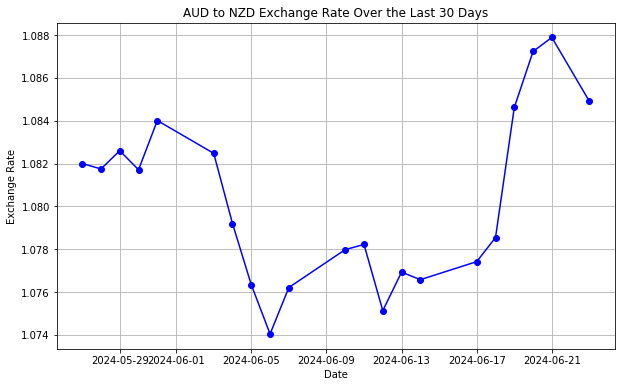

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(exchange_df.index, exchange_df['Close'], marker='o', linestyle='-', color='b')
plt.title('AUD to NZD Exchange Rate Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.savefig('exchange_rate_trend.png')
plt.show()

##### Histogram

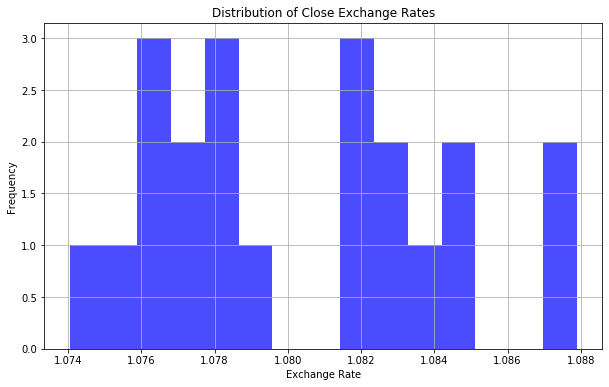

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(exchange_df['Close'], bins=15, color='blue', alpha=0.7)
plt.title('Distribution of Close Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('exchange_rate_distribution.png')
plt.show()

##### Box plot

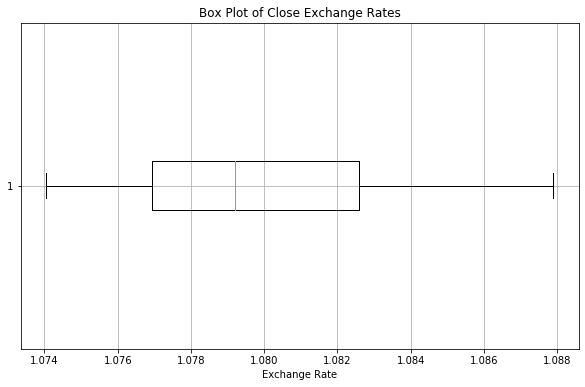

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot(exchange_df['Close'], vert=False)
plt.title('Box Plot of Close Exchange Rates')
plt.xlabel('Exchange Rate')
plt.grid(True)
plt.savefig('exchange_rate_boxplot.png')
plt.show()

#####  Moving average plot

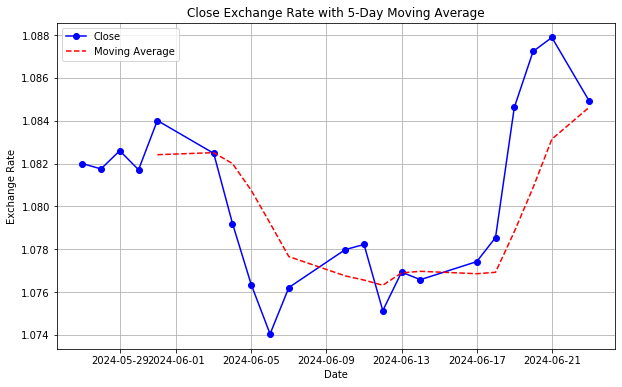

In [20]:
exchange_df['Moving Average'] = exchange_df['Close'].rolling(window=5).mean()
plt.figure(figsize=(10, 6))
plt.plot(exchange_df.index, exchange_df['Close'], marker='o', linestyle='-', color='b', label='Close')
plt.plot(exchange_df.index, exchange_df['Moving Average'], linestyle='--', color='r', label='Moving Average')
plt.title('Close Exchange Rate with 5-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.savefig('exchange_rate_moving_average.png')
plt.show()
